In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
from src.results.summary import *
sns.set_theme(style="ticks", palette="pastel")

## Datasets description

In [3]:
pd.read_parquet('../data/results/dfs_description.parquet')

,instances,n_features,class_prop
appendicitis,106,8,0.198
australian,690,15,0.445
backache,180,32,0.139
banknote,1372,5,0.445
breastcancer,569,31,0.373
bupa,345,6,0.490
cleve,303,14,0.455
colon-cancer,62,2001,0.355
diabetes,768,9,0.349
flare,1066,11,0.171


## Analysis of MOE hyper-parameters

In [4]:
pd.read_parquet('../data/results/df_hyperparameters.parquet')

MOE SVM  MOE DT  MOE KNN
type        value                          
Wrab        False        8       9       11
            True        17      16       14
lambda      1            6      15        7
            3            6       5        5
            5           13       5       13
N. Learners 10           5       3        6
            20           9      11        9
            30          11      11       10
P. Sample   0.10        10       7       10
            0.30         8       7        5
            0.50         7      11       10

### MOE SVM

In [6]:
params_df_svm = params(results_path='../results', method='MoeSvm.p')

In [7]:
params_df_svm

,WRAB,lambda,N. Learners,P. Sample
appendicitis,True,5,30,0.1
australian,True,5,20,0.1
backache,True,1,10,0.1
banknote,True,1,10,0.3
breastcancer,True,3,10,0.5
bupa,True,3,20,0.1
cleve,False,1,20,0.5
colon-cancer,True,5,30,0.3
diabetes,True,1,20,0.3
flare,True,5,30,0.1


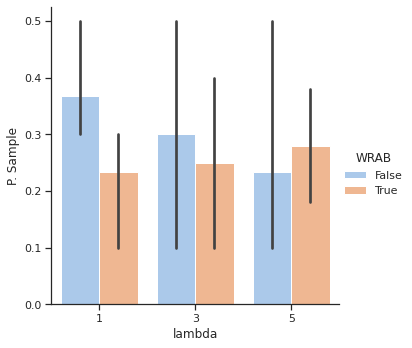

In [7]:
sns.catplot(x="lambda", y="P. Sample", hue="WRAB", kind="bar", data=params_df_svm);

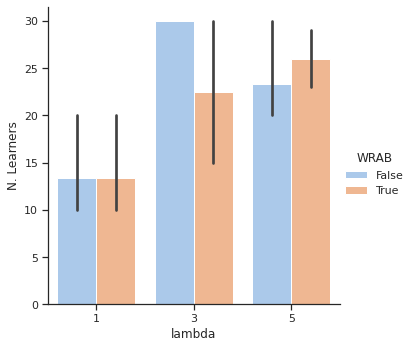

In [8]:
sns.catplot(x="lambda", y="N. Learners", hue="WRAB", kind="bar", data=params_df_svm);

### MODE DT

In [9]:
params_df_dt = params(results_path='../results', method='MoeDt.p')

In [10]:
params_df_dt

,WRAB,lambda,N. Learners,P. Sample
appendicitis,True,1,10,0.5
australian,False,5,10,0.5
backache,True,1,30,0.5
banknote,True,1,30,0.5
breastcancer,True,1,30,0.1
bupa,True,3,20,0.3
cleve,False,5,30,0.1
colon-cancer,True,1,30,0.3
diabetes,True,1,30,0.1
flare,True,5,20,0.1


In [11]:
params_df_dt.groupby(['WRAB']).size()

WRAB
False     9
True     16
dtype: int64

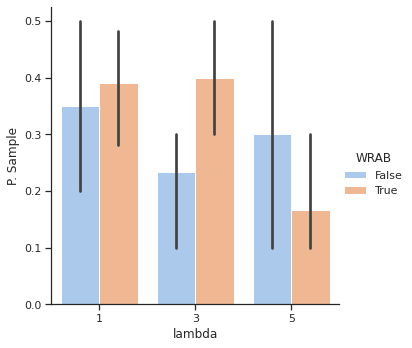

In [12]:
sns.catplot(x="lambda", y="P. Sample", hue="WRAB", kind="bar", data=params_df_dt);

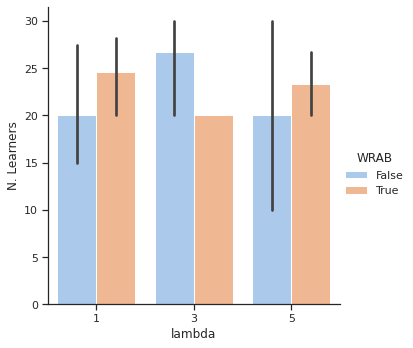

In [13]:
sns.catplot(x="lambda", y="N. Learners", hue="WRAB", kind="bar", data=params_df_dt);

### MOE Knn

In [14]:
params_df_knn = params(results_path='../results', method='MoeKnn.p')

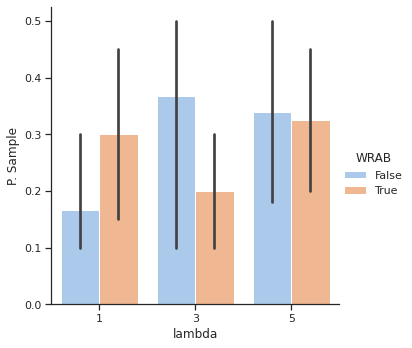

In [15]:
sns.catplot(x="lambda", y="P. Sample", hue="WRAB", kind="bar", data=params_df_knn);

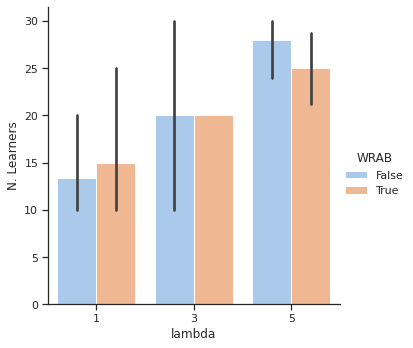

In [16]:
sns.catplot(x="lambda", y="N. Learners", hue="WRAB", kind="bar", data=params_df_knn);